In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import golden

plt.style.use('fivethirtyeight')

In [2]:
heroes = pd.read_csv('../data/heroes.csv', sep=';', index_col=0)
heroes= heroes[heroes['First appearance'] < 2020]

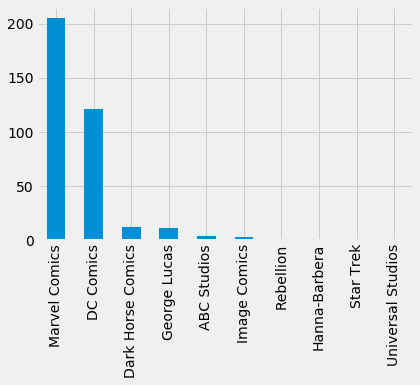

In [3]:
heroes['Publisher'].value_counts().plot.bar()
plt.show()

In [4]:
publisher_freq = pd.crosstab(index=heroes['Publisher'],
    columns=['Abs. freqence'],
    colnames=[''])
publisher_freq

,Abs. freqence
Publisher,
ABC Studios,4
DC Comics,121
Dark Horse Comics,12
George Lucas,11
Hanna-Barbera,1
Image Comics,3
Marvel Comics,205
Rebellion,1
Star Trek,1


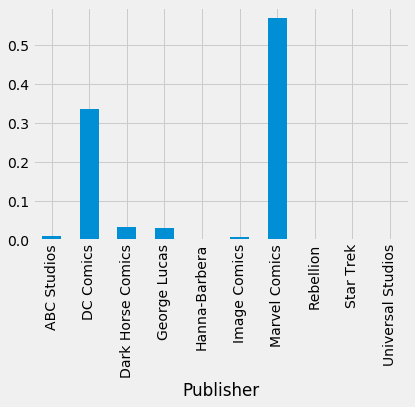

In [5]:
(publisher_freq / publisher_freq.sum()).plot.bar(legend=False)
plt.show()

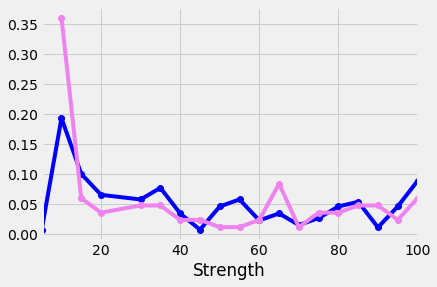

In [6]:
male_strength_freq = pd.crosstab(
    index=heroes.loc[heroes['Gender']=='M', 'Strength'],
    columns='Abs. frequence',
    normalize=True).loc[:, 'Abs. frequence']

female_strength_freq = pd.crosstab(
    index=heroes.loc[heroes['Gender']=='F', 'Strength'],
    columns='Abs. frequence',
    normalize=True).loc[:, 'Abs. frequence']

male_strength_freq.plot(marker='o', color='blue', legend=False)
female_strength_freq.plot(marker='o', color='violet', legend=False)
plt.show()

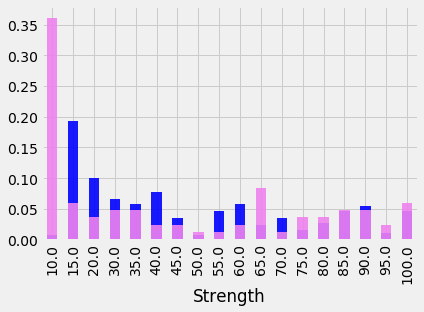

In [7]:
male_strength_freq.plot.bar(color='blue', legend=False, alpha=0.9)
female_strength_freq.plot.bar(color='violet', legend=False, alpha=0.9)
plt.show()

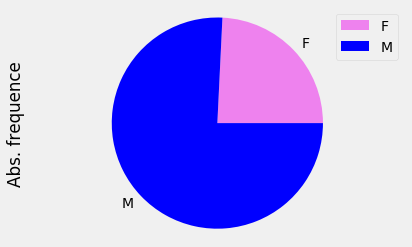

In [8]:
gender_freq = pd.crosstab(
    index=heroes['Gender'],
    columns=['Abs. frequence'],
    colnames=[''])

gender_freq.plot.pie('Abs. frequence', colors=['violet', 'blue'])
plt.axis('equal')
plt.show()

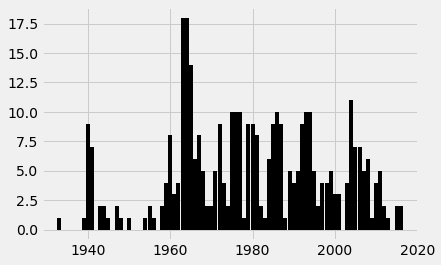

In [9]:
first_app_freq = pd.crosstab(
    index=heroes['First appearance'],
    columns=['Abs. frequence'],
    colnames=[''])

plt.vlines(first_app_freq.index, 0, first_app_freq.get_values())
plt.show()

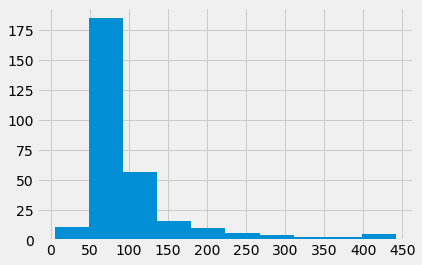

In [10]:
heroes.loc[heroes['Weight'] < 500, 'Weight'].hist(bins=10)
plt.xticks(np.arange(0, 500, 50))
plt.show()

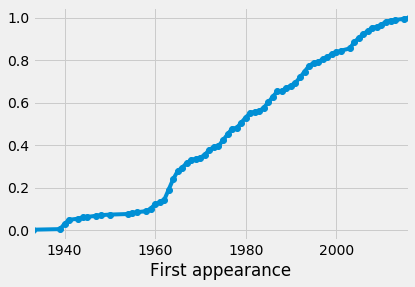

In [11]:
first_app_cumfreq = pd.crosstab(
    index=heroes['First appearance'],
    columns=['Abs. frequence'],
    colnames=[''],
    normalize=True).cumsum()

first_app_cumfreq.plot(marker='o', legend=False)
plt.show()

/opt/conda/envs/python2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


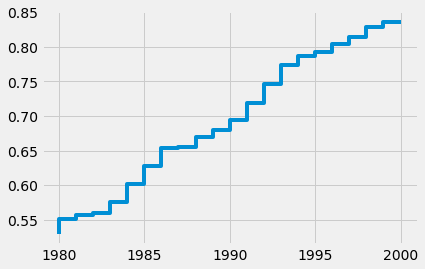

In [12]:
import statsmodels.api as sm

ecdf = sm.distributions.ECDF(heroes['First appearance'])
x = np.arange(1980, 2001, 1)
y = ecdf(x)
plt.step(x, y)
plt.show()

In [13]:
from paretochart import pareto

eye_color_relfreq = heroes['Eye color'].value_counts() / len(heroes)
common_eye_color_relfreq = eye_color_relfreq[eye_color_relfreq > .02]
common_eye_color_relfreq

Blue      0.325137
Brown     0.213115
Green     0.109290
Red       0.081967
Yellow    0.038251
Black     0.027322
White     0.021858
Name: Eye color, dtype: float64

In [14]:
common_eye_color_heroes = heroes['Eye color'][heroes['Eye color'].isin(common_eye_color_relfreq.index)]
common_eye_color_heroes_relfreq = common_eye_color_heroes.value_counts() / len(common_eye_color_heroes)
common_eye_color_heroes_relfreq

Blue      0.397993
Brown     0.260870
Green     0.133779
Red       0.100334
Yellow    0.046823
Black     0.033445
White     0.026756
Name: Eye color, dtype: float64

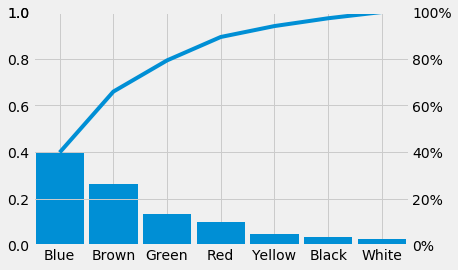

In [15]:
pareto(
    common_eye_color_heroes_relfreq,
    labels=common_eye_color_heroes_relfreq.index)
plt.show()

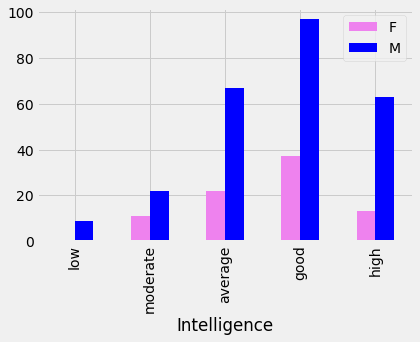

In [16]:
int_gender_freq = pd.crosstab(
    index=heroes['Intelligence'],
    columns=heroes['Gender'],
    colnames=[''])

int_gender_freq = int_gender_freq.loc[['low', 'moderate', 'average', 'good', 'high'], :]

int_gender_freq.plot.bar(color=['violet', 'blue'])
plt.show()

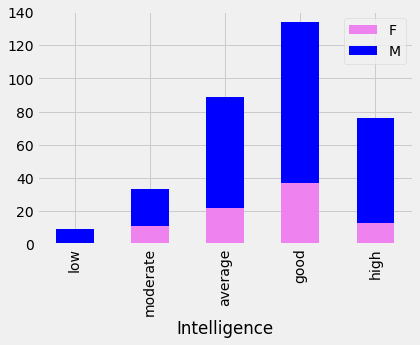

In [17]:
int_gender_freq.plot.bar(color=['violet', 'blue'], stacked=True)
plt.show()

In [18]:
pd.crosstab(
    index=pd.cut(heroes['Weight'], bins=[25, 50, 75, 100, 200, 500, 1000]),
    columns=heroes['Gender'],
    colnames=[''])

,F,M
Weight,,
"(25, 50]",3,4
"(50, 75]",63,28
"(75, 100]",4,103
"(100, 200]",3,57
"(200, 500]",0,24
"(500, 1000]",1,4


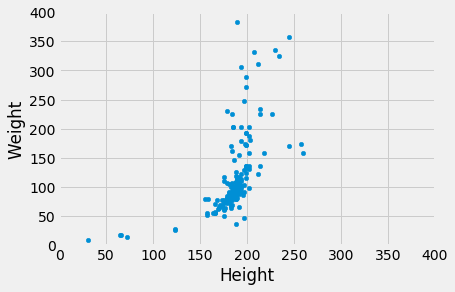

In [19]:
heroes[heroes['Gender'] == 'M'].plot.scatter('Height', 'Weight')
plt.ylim(0, 400)
plt.xlim(0, 400)
plt.show()

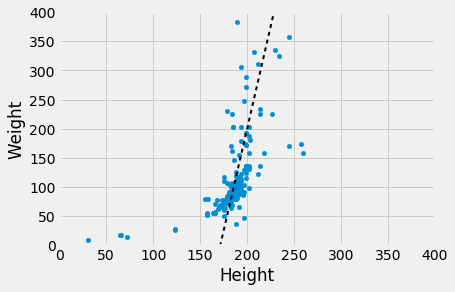

In [20]:
heroes[heroes['Gender'] == 'M'].plot.scatter('Height', 'Weight')
plt.ylim(0, 400)
plt.xlim(0, 400)

y = lambda x: x * 7 - 1200
x = [0, 400]
line, = plt.plot(x, list(map(y, x)), color='black')
line.set_dashes([2, 2])
line.set_linewidth(2)
plt.show()

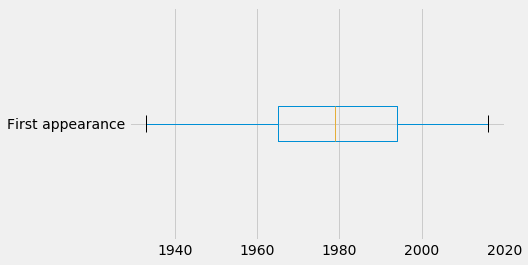

In [21]:
first_app = heroes['First appearance']
first_app.plot.box(vert=False, whis='range')
plt.show()

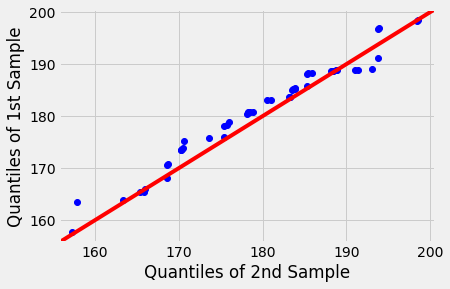

In [22]:
marvel_height = heroes.loc[heroes['Publisher'] == 'Marvel Comics', 'Height']
dc_height = heroes.loc[heroes['Publisher'] == 'DC Comics', 'Height']

marvel_sample = marvel_height[marvel_height.between(100, 200)].sample(50)
dc_sample = dc_height[dc_height.between(100, 200)].sample(50)

import statsmodels.api as sm

sm.qqplot_2samples(marvel_sample, dc_sample, line='45')
plt.show()